# Starvation Period Analysis & Prediction

## Problem Statement
Starvation has been one of the major problems the world is tackling with right now, much of the food is wasted or is mismanaged in ways that are not fully discovered by the human beings, so in order to mitigate starvation in any country, we first need to look upon different factors that affect the starvation growth in a country.

## Purpose
The project has been proposed to discover different factors that are involved in the starvation growth of the country, The dataset that has been utilized is for Pakistan, so we can explore the sample dataset, identify the factors using different data analysis techniques in visual form and also have the ability to predict/generate datasets for upcoming years as well.

## Target Levels
The target levels chosen for this project is the public, mostly the dataset is focused around collecting variables that target lower middle class and people who are below par the poverty lines, because mostly these groups of people face starvation.

## Activities

### 0. Importing necessary libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Analysis for consumption, production and hunger
In this comparison we are utilizing multiple-line bar chart which contains 4 variables:

1. Consumption
2. Production
3. Hunger
4. Time

The first 2 variables combine data of food materials such as wheat, rice, barley and meat which are commonly utilized by every citizen in Pakistan.


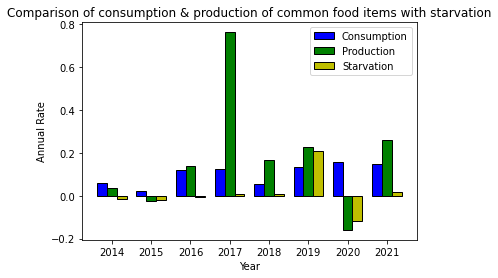

In [91]:
data = pd.read_csv(r'./Project-Dataset.csv', skiprows=range(1,55))

n=len(data)
r = np.arange(n)
width = 0.25
  
plt.bar(r, (data["Wheat Consumption Growth Rate"] + data["Barley Consumption Growth Rate"] + data["Meat Consumption Growth Rate"] + data["Rice Consumption Growth Rate"] )/4, color = 'b',
        width = width, edgecolor = 'black',
        label='Consumption')

plt.bar(r+width, (data["Wheat Production Growth Rate"] + data["Barley Production Growth Rate"] + data["Meat Production Growth Rate"] + data["Rice Production Growth Rate"] )/4, color = 'g',
        width = width, edgecolor = 'black',
        label='Production')

plt.bar(r+width*2, data["Hunger Annual Change"], color = 'y',
        width = width, edgecolor = 'black',
        label='Starvation')


plt.xlabel("Year")
plt.ylabel("Annual Rate")
plt.title("Comparison of consumption & production of common food items with starvation")
plt.xticks(r + width, data["Year"])
plt.legend()
  
plt.show()

#### Conclusion
By looking over the chart we can analyze that:
- The production has mostly been more than the consumption in the country, as Pakistan relies more on agriculture, most of its imports consist of technology and exports are mostly composed of agricultural goods.
- When the production drops below negative value, the hunger statistics also drop below negative which implies that if the production of some specific items is higher it is than easily available in the market at cheaper prices which allows the poor people to partake and thus reduce starvation.

### 2. Analysis for imports, exports and hunger

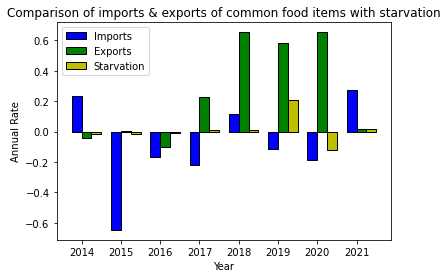

In [92]:
plt.bar(r, (data["Wheat Imports Growth Rate"] + data["Barley Imports Growth Rate"] + data["Meat Imports Growth Rate"] + data["Rice Imports Growth Rate"] )/4, color = 'b',
        width = width, edgecolor = 'black',
        label='Imports')

plt.bar(r+width, (data["Wheat Exports Growth Rate"] + data["Barley Exports Growth Rate"] + data["Meat Exports Growth Rate"] + data["Rice Exports Growth Rate"] )/4, color = 'g',
        width = width, edgecolor = 'black',
        label='Exports')

plt.bar(r+width*2, data["Hunger Annual Change"], color = 'y',
        width = width, edgecolor = 'black',
        label='Starvation')


plt.xlabel("Year")
plt.ylabel("Annual Rate")
plt.xticks(r + width/2, data["Year"])
plt.title("Comparison of imports & exports of common food items with starvation")
plt.legend()
  
plt.draw()

### 3. Analysis of relationship between starvation & unemployment

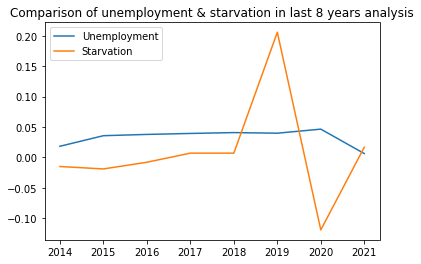

In [93]:
plt.plot(data["Year"], data["Unemployment Per Year"], label="Unemployment")
plt.plot(data["Year"], data["Hunger Annual Change"], label="Starvation")
plt.title("Comparison of unemployment & starvation in last 8 years analysis")
plt.legend()
plt.show()


### 4. Analysis of relationship between starvation & inflation

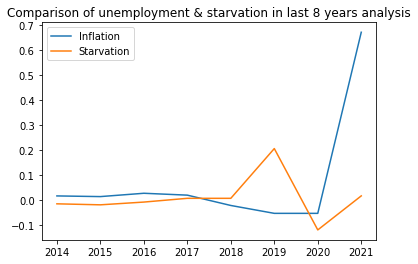

In [95]:
plt.plot(data["Year"], data["Inflation Annual Change"], label="Inflation")
plt.plot(data["Year"], data["Hunger Annual Change"], label="Starvation")
plt.title("Comparison of unemployment & starvation in last 8 years analysis")
plt.legend()
plt.show()